**Name :Protik Goswami**



**Id :221-15-5841**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("/content/drive/MyDrive/Protik/xm_final/Sample_Data_AI_Lab_Final.csv")

In [9]:
data

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,TotalCharges,Contract
0,1,0,3,3,3,3,3,3,24.10,1734.65,Two year
1,0,2,0,1,1,0,1,0,88.15,3973.2,Month-to-month
2,1,2,0,0,0,0,0,0,74.95,2869.85,Month-to-month
3,0,1,0,0,0,0,0,1,55.90,238.5,Month-to-month
4,0,1,1,0,1,0,0,0,53.45,119.5,Month-to-month
...,...,...,...,...,...,...,...,...,...,...,...
5981,0,2,1,0,0,0,1,1,95.00,95,Month-to-month
5982,1,1,1,1,1,1,1,1,91.10,2198.3,Two year
5983,0,0,3,3,3,3,3,3,21.15,306.05,Month-to-month
5984,1,2,0,0,1,0,1,1,99.45,1200.15,Month-to-month


**Handle Missing Values**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MultipleLines     5986 non-null   int64  
 1   InternetService   5986 non-null   int64  
 2   OnlineSecurity    5986 non-null   int64  
 3   OnlineBackup      5986 non-null   int64  
 4   DeviceProtection  5986 non-null   int64  
 5   TechSupport       5986 non-null   int64  
 6   StreamingTV       5986 non-null   int64  
 7   StreamingMovies   5986 non-null   int64  
 8   MonthlyCharges    5986 non-null   float64
 9   TotalCharges      5986 non-null   object 
 10  Contract          5986 non-null   object 
dtypes: float64(1), int64(8), object(2)
memory usage: 514.6+ KB


In [11]:
data.columns

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'MonthlyCharges', 'TotalCharges', 'Contract'],
      dtype='object')

In [12]:
data.isnull().sum()

,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0
StreamingTV,0
StreamingMovies,0
MonthlyCharges,0
TotalCharges,0


**Encoding Categorical Variables**

In [13]:
# Apply One-Hot Encoding
data_one_hot = pd.get_dummies(data, columns=['Contract'], drop_first=True)

# Check the transformed data
print(data_one_hot.head())


   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               3             3   
1              0                2               0             1   
2              1                2               0             0   
3              0                1               0             0   
4              0                1               1             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 3            3            3                3   
1                 1            0            1                0   
2                 0            0            0                0   
3                 0            0            0                1   
4                 1            0            0                0   

   MonthlyCharges TotalCharges  Contract_One year  Contract_Two year  
0           24.10      1734.65              False               True  
1           88.15       3973.2              False         

In [14]:
data

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,TotalCharges,Contract
0,1,0,3,3,3,3,3,3,24.10,1734.65,Two year
1,0,2,0,1,1,0,1,0,88.15,3973.2,Month-to-month
2,1,2,0,0,0,0,0,0,74.95,2869.85,Month-to-month
3,0,1,0,0,0,0,0,1,55.90,238.5,Month-to-month
4,0,1,1,0,1,0,0,0,53.45,119.5,Month-to-month
...,...,...,...,...,...,...,...,...,...,...,...
5981,0,2,1,0,0,0,1,1,95.00,95,Month-to-month
5982,1,1,1,1,1,1,1,1,91.10,2198.3,Two year
5983,0,0,3,3,3,3,3,3,21.15,306.05,Month-to-month
5984,1,2,0,0,1,0,1,1,99.45,1200.15,Month-to-month


**Feature Scaling**

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Contract' column
data['Contract'] = label_encoder.fit_transform(data['Contract'])

# Now apply MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
contract_values = data['Contract'].values.reshape(-1, 1)
data['Contract'] = min_max_scaler.fit_transform(contract_values)

# Display the normalized data
print(data['Contract'].head())

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Contract, dtype: float64


In [16]:
data

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,TotalCharges,Contract
0,1,0,3,3,3,3,3,3,24.10,1734.65,1.0
1,0,2,0,1,1,0,1,0,88.15,3973.2,0.0
2,1,2,0,0,0,0,0,0,74.95,2869.85,0.0
3,0,1,0,0,0,0,0,1,55.90,238.5,0.0
4,0,1,1,0,1,0,0,0,53.45,119.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5981,0,2,1,0,0,0,1,1,95.00,95,0.0
5982,1,1,1,1,1,1,1,1,91.10,2198.3,1.0
5983,0,0,3,3,3,3,3,3,21.15,306.05,0.0
5984,1,2,0,0,1,0,1,1,99.45,1200.15,0.0


**Dataset Splitting**

In [17]:
from sklearn.model_selection import train_test_split

# Prepare the dataset for splitting
# 'Contract' is assumed to be the target variable
X = data.drop(columns=['Contract'])  # Features
y = data['Contract']  # Target

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display the shapes of the resulting datasets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (4788, 10)
Testing Features Shape: (1198, 10)
Training Target Shape: (4788,)
Testing Target Shape: (1198,)


In [18]:
data

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,TotalCharges,Contract
0,1,0,3,3,3,3,3,3,24.10,1734.65,1.0
1,0,2,0,1,1,0,1,0,88.15,3973.2,0.0
2,1,2,0,0,0,0,0,0,74.95,2869.85,0.0
3,0,1,0,0,0,0,0,1,55.90,238.5,0.0
4,0,1,1,0,1,0,0,0,53.45,119.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5981,0,2,1,0,0,0,1,1,95.00,95,0.0
5982,1,1,1,1,1,1,1,1,91.10,2198.3,1.0
5983,0,0,3,3,3,3,3,3,21.15,306.05,0.0
5984,1,2,0,0,1,0,1,1,99.45,1200.15,0.0


**Classification Task**
Implement the following classification algorithms to predict the target variable
- K-Nearest Neighbors (KNN)
- Random Forest Classifier
- Naïve Bayes Classifier

In [19]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [20]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4,cluster_std = 1.5, random_state = 41)

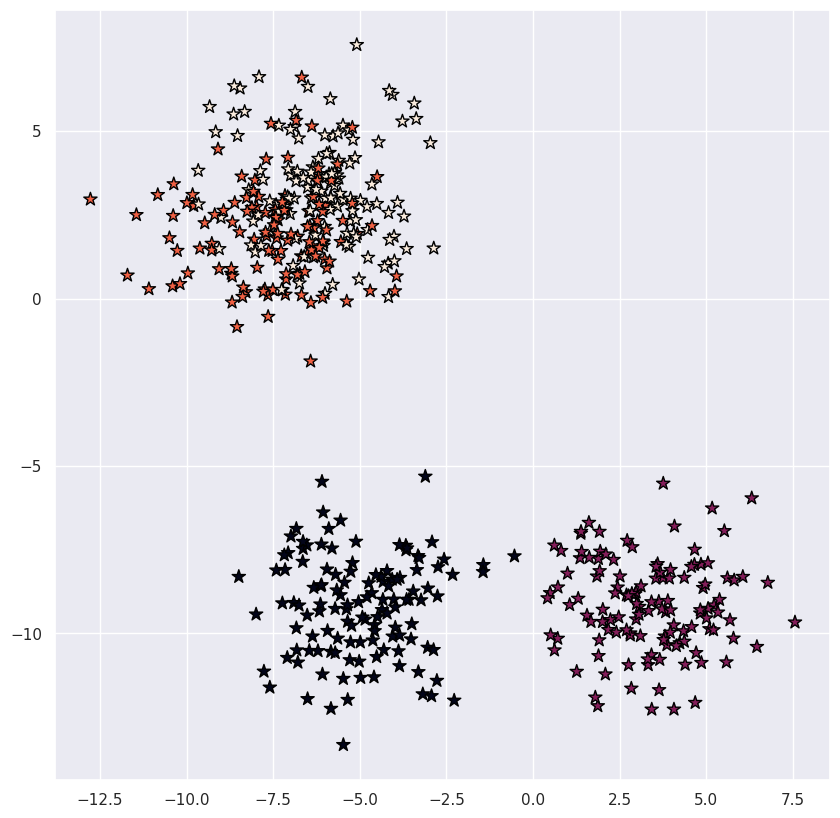

In [21]:
sns.set_theme()
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='*', s=100, edgecolors='black')
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [23]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [24]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=5 83.2
Accuracy with k=1 83.2


**KNN**

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict KNN model
y_pred_knn = knn.predict(X_test)

# Generate classification
print("K-Nearest Neighbors (KNN) Classification Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        34
           2       0.66      0.68      0.67        31
           3       0.62      0.59      0.60        27

    accuracy                           0.83       125
   macro avg       0.82      0.82      0.82       125
weighted avg       0.83      0.83      0.83       125



** Random Forest Classifier**

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict Random Forest model
y_pred_rf = rf.predict(X_test)

# Generate classification report
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        34
           2       0.69      0.65      0.67        31
           3       0.62      0.67      0.64        27

    accuracy                           0.84       125
   macro avg       0.83      0.83      0.83       125
weighted avg       0.84      0.84      0.84       125



**Naïve Bayes Classifier**

In [28]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict Naive Bayes model
y_pred_nb = nb.predict(X_test)

# Generate classification report
print("Naïve Bayes Classifier Classification Report:")
print(classification_report(y_test, y_pred_nb))


Naïve Bayes Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        34
           2       0.74      0.74      0.74        31
           3       0.70      0.70      0.70        27

    accuracy                           0.87       125
   macro avg       0.86      0.86      0.86       125
weighted avg       0.87      0.87      0.87       125



Evaluation Metrics
For each classifier, generate a detailed **classification report** that includes the
following metrics:
1. Precision
2. Recall
3. F1-Score
4. Accuracy

In [29]:
from sklearn.metrics import classification_report, accuracy_score

def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} Classification Report ---")
    print(classification_report(y_true, y_pred))
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}\n")

# (KNN)
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")

# Random Forest Classifier
evaluate_model(y_test, y_pred_rf, "Random Forest Classifier")

# Naive Bayes Classifier
evaluate_model(y_test, y_pred_nb, "Naive Bayes Classifier")


--- K-Nearest Neighbors (KNN) Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        34
           2       0.66      0.68      0.67        31
           3       0.62      0.59      0.60        27

    accuracy                           0.83       125
   macro avg       0.82      0.82      0.82       125
weighted avg       0.83      0.83      0.83       125

Accuracy: 0.8320

--- Random Forest Classifier Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        34
           2       0.69      0.65      0.67        31
           3       0.62      0.67      0.64        27

    accuracy                           0.84       125
   macro avg       0.83      0.83      0.83       125
weighted avg       0.84      0.84      0.84       125

A

Comparative Analysis
Compare the performance of the three algorithms using the metrics generated in the
classification reports. Include a brief discussion addressing:
- Which algorithm performs the best based on the metrics.
- The possible reasons for the observed performance differences.
- Recommendations for improving classification performance if necessary.

In [31]:
import pandas as pd

# Collect metrics for each model
metrics = {
    "Model": ["KNN", "Random Forest", "Naive Bayes"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_nb)
    ],
    "Precision": [
        classification_report(y_test, y_pred_knn, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, y_pred_nb, output_dict=True)['weighted avg']['precision']
    ],
    "Recall": [
        classification_report(y_test, y_pred_knn, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, y_pred_nb, output_dict=True)['weighted avg']['recall']
    ],
    "F1-Score": [
        classification_report(y_test, y_pred_knn, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, y_pred_nb, output_dict=True)['weighted avg']['f1-score']
    ]
}

metrics_df = pd.DataFrame(metrics)

print("Comparative Analysis of Classification Models:")
print(metrics_df)
print("\nBest Performing Model per Metric:")
print(metrics_df.loc[metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].idxmax()])


Comparative Analysis of Classification Models:
           Model  Accuracy  Precision  Recall  F1-Score
0            KNN     0.832   0.831673   0.832  0.831748
1  Random Forest     0.840   0.841103   0.840  0.840190
2    Naive Bayes     0.872   0.872000   0.872  0.872000

Best Performing Model per Metric:
         Model  Accuracy  Precision  Recall  F1-Score
2  Naive Bayes     0.872      0.872   0.872     0.872
2  Naive Bayes     0.872      0.872   0.872     0.872
2  Naive Bayes     0.872      0.872   0.872     0.872
2  Naive Bayes     0.872      0.872   0.872     0.872
